# ENTERPRISE KNOWLEDGE'S IMDB DATA CHALLENGE

### First, the CSV data

In [1]:
import pandas as pd

imdb_csv_df = pd.read_csv('imdb_csv.csv')

In [2]:
# preview the dataset
imdb_csv_df

,Unnamed: 0,title,year,kind,rating,vote,runtime
0,0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50
1,1,Character,2021,movie,8.3,46.0,125
2,2,Get Up and Dance!,1994,video movie,8.1,18.0,54
3,3,The Rise and Fall of El Chapo,2016,tv movie,6.9,42.0,85
4,5,8 Man,1992,movie,5.5,93.0,83
...,...,...,...,...,...,...,...
9751,9821,All Monsters Attack,1969,movie,3.9,4384.0,69
9752,9822,Fidel Castro,2005,episode,6.4,44.0,0
9753,9823,Epoch,2001,tv movie,4.9,2376.0,96
9754,9824,The Company,2003,movie,6.3,6501.0,112


In [4]:
# check number of rows
imdb_csv_df.shape[0]

9756

In [5]:
# just checking the number of columns, it's pretty obvious!
imdb_csv_df.shape[1]

7

In [6]:
# looks like we got some null values in rating and vote columns
imdb_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9756 non-null   int64  
 1   title       9756 non-null   object 
 2   year        9756 non-null   int64  
 3   kind        9756 non-null   object 
 4   rating      8949 non-null   float64
 5   vote        8949 non-null   float64
 6   runtime     9756 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 533.7+ KB


In [7]:
# we mostly care that there are duplicates in the title column
# when we do find a duplicate title, we want to check that it is not a different media expression (e.g. movie, tv series)
imdb_csv_df.pivot_table(index = ['title'], aggfunc ='size')

title
"Curb Your Enthusiasm" Season 10 Highlights                 1
"The Fosters" Season 5 Set Visit                            1
$ellebrity: The Go-To Girls - A Special Edition of 20/20    2
'Angel': Season 4 Overview                                  1
'Angel': Season One                                         2
                                                           ..
eXistenZ                                                    1
s-CRY-ed                                                    1
xXx: State of the Union                                     1
¡Vampiros en La Habana!                                     1
À Nous la Liberté                                           1
Length: 9148, dtype: int64

In [8]:
# let's check $ellebrity, for example. The problem here is that two episodes in the 2020 season figure in the IMDB database. 
# hence, they may not be duplicates after all.
imdb_csv_df[(imdb_csv_df["title"].eq("$ellebrity: The Go-To Girls - A Special Edition of 20/20"))]

,Unnamed: 0,title,year,kind,rating,vote,runtime
1920,1933,$ellebrity: The Go-To Girls - A Special Editio...,2020,episode,NaN,NaN,0
6296,6343,$ellebrity: The Go-To Girls - A Special Editio...,2020,episode,NaN,NaN,0


In [9]:
# let's use this method instead to check for duplicate ROWS not titles
df1 = imdb_csv_df.groupby(imdb_csv_df.columns.tolist(), as_index=False).size()
df1.head(5)

,Unnamed: 0,title,year,kind,rating,vote,runtime,size
0,0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50,1
1,1,Character,2021,movie,8.3,46.0,125,1
2,2,Get Up and Dance!,1994,video movie,8.1,18.0,54,1
3,3,The Rise and Fall of El Chapo,2016,tv movie,6.9,42.0,85,1
4,5,8 Man,1992,movie,5.5,93.0,83,1


In [10]:
# there doesn't appear to be duplicate rows, that is rows with the same title and kind
# I can conclude that there are no duplicates in the CSV...?
df1[df1["size"] > 1]

,Unnamed: 0,title,year,kind,rating,vote,runtime,size


In [11]:
# just in case, let's drop the duplicate rows. 
df2 = len(imdb_csv_df)-len(imdb_csv_df.drop_duplicates())
print(df2)

0


### Now, the JSON data

In [12]:
# this will fail due to different lengths in row.
# imdb_json_df = pd.read_json('imdb_json.json')

In [458]:
# typically, we can use json_normalize() to deal with this issue, but let me show you why it's not ideal

# ini_dict = {"2003": [{"Dinosaur Planet": {"composer": "NaN", "cast": ["Christian Slater", "Scott Sampson"], "language": ["English"], "director": "NaN", "country": ["United States"], "genre": ["Documentary", "Animation", "Family"], "writer": ["Mike Carrol", "Mike Carroll", "Georgann Kane"]}}, {"Daydream Obsession": {"composer": "NaN", "cast": ["Joe Dain", "Kris Black", "Julian Coca", "Danny Dallas", "Justin Hasan", "Crystal Levine", "Rafael", "Will Thomas", "Adam Wilde"], "language": ["English"], "director": ["Thomas R. Smyth"], "country": ["United States"], "genre": ["Romance"], "writer": ["Scott Yarbrough"]}}]}
# for v in ini_dict.values():
#     df = pd.json_normalize(v)
# df

,Dinosaur Planet.composer,Dinosaur Planet.cast,Dinosaur Planet.language,Dinosaur Planet.director,Dinosaur Planet.country,Dinosaur Planet.genre,Dinosaur Planet.writer,Daydream Obsession.composer,Daydream Obsession.cast,Daydream Obsession.language,Daydream Obsession.director,Daydream Obsession.country,Daydream Obsession.genre,Daydream Obsession.writer
0,NaN,"[Christian Slater, Scott Sampson]",[English],NaN,[United States],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough]


### Different method for dealing with arrays of variable lengths

In [3]:
import json

with open('imdb_json.json') as user_file:
  file_contents = user_file.read()

# json.loads() converts JSON to a dictionary
parsed_json = json.loads(file_contents)

In [4]:
# there are 109 years in this data
# convert list of dictionaries to pandas dataframe
df3 = pd.DataFrame.from_dict(parsed_json, orient='index')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, 2003 to 1924
Columns: 668 entries, 0 to 667
dtypes: object(668)
memory usage: 569.7+ KB


In [5]:
# transpose flips the matrix around, such that year is now the column

df4 = df3.transpose()
df4.head(5)

,2003,2021,1994,2016,1992,2004,1991,2010,2019,1999,...,1937,1941,2023,1922,1923,1910,1935,1913,1914,1924
0,"{'Dinosaur Planet': {'composer': nan, 'cast': ...","{'Character': {'composer': ['Youki Kojima'], '...","{'Get Up and Dance!': {'composer': nan, 'cast'...",{'The Rise and Fall of El Chapo': {'composer':...,"{'8 Man': {'composer': ['Carole King'], 'cast'...",{'What the #$*! Do We (K)now!?': {'composer': ...,{'Class of Nuke 'Em High Part II: Subhumanoid ...,{'The Fighter': {'composer': ['Michael Brook']...,{'The Lord of the Rings: The Return of the Kin...,{'Antarctica: The End of Earth - Iceberg': {'c...,...,"{'Bizarre, Bizarre': {'composer': ['Maurice Ja...","{'The 47 Ronin': {'composer': ['Shirô Fukai'],...",{'Harold and the Purple Crayon': {'composer': ...,"{'Häxan': {'composer': ['Matti Bye', 'Launy Gr...","{'Three Ages': {'composer': ['Robert Israel'],...",{'Happy Days on the Sea Shore': {'composer': n...,{'The Triumph of the Will': {'composer': ['Her...,"{'The Special Officer': {'composer': nan, 'cas...","{'The Perils of Pauline': {'composer': nan, 'c...","{'The Marriage Circle': {'composer': nan, 'cas..."
1,"{'Daydream Obsession': {'composer': nan, 'cast...",{'The Yinyang Master': {'composer': ['Shigeru ...,{'Maya Lin: A Strong Clear Vision': {'composer...,{'Silent Service': {'composer': ['Chris Lott']...,{'Stepping Razor: Red X': {'composer': ['Peter...,{'Sesame Street Presents: The Street We Live O...,{'100 Days Before the Command': {'composer': n...,"{'Man in the Iron Mask': {'composer': nan, 'ca...",{'Star Trek Voyager: Phage - ECMO Won't be the...,{'Meat Loaf: Bat Out of Hell': {'composer': na...,...,{'Pépé le Moko': {'composer': ['Vincent Scotto...,{'The Shanghai Gesture': {'composer': ['Richar...,{'The Little Mermaid': {'composer': ['Alan Men...,{'Nanook of the North': {'composer': ['Rudolf ...,None,None,"{'The 39 Steps': {'composer': ['Jack Beaver', ...",None,None,"{'Aelita, the Queen of Mars': {'composer': nan..."
2,{'The Bonesetter': {'composer': ['Sylvain Lavi...,"{'Saudade do futuro': {'composer': nan, 'cast'...",{'Luther Vandross: Always and Forever': {'comp...,"{'Gupt': {'composer': nan, 'cast': ['Satyajeet...",{'Batman: The Animated Series': {'composer': n...,"{'Sex and the Beauties': {'composer': nan, 'ca...","{'He Said, She Said': {'composer': ['Miles Goo...",{'American Chopper: Senior vs. Junior': {'comp...,{'Sports Illustrated Swimsuit Issue': {'compos...,{'Ricky Martin: One Night Only': {'composer': ...,...,"{'Dizzy Doctors': {'composer': nan, 'cast': na...",{'Penny Serenade': {'composer': ['W. Franke Ha...,None,None,None,None,None,None,None,None
3,"{'Carandiru': {'composer': ['André Abujamra'],...",{'Public Policy a miniseries': {'composer': na...,{'Where's God When I'm S-Scared??': {'composer...,"{'Option Zero': {'composer': nan, 'cast': ['Ch...","{'Jewels': {'composer': nan, 'cast': ['""Annett...",{'The Libertine': {'composer': ['Michael Nyman...,{'Don't Tell Mom the Babysitter's Dead': {'com...,{'The Light of My Eyes': {'composer': ['Amr Is...,"{'Sci-Fi Special Feature': {'composer': nan, '...","{'6ixtynin9': {'composer': nan, 'cast': ['Lali...",...,{'The Edge of the World': {'composer': ['Lambe...,"{'All the World's a Stooge': {'composer': nan,...",None,None,None,None,None,None,None,None
4,"{'DarkWolf': {'composer': ['Geoff Levin'], 'ca...",{'Pretty Boy': {'composer': ['Klaus Pfreundner...,{'Cheyenne Warrior': {'composer': ['Arthur Kem...,{'Christmas with the Andersons': {'composer': ...,{'The Smiths: The Complete Picture': {'compose...,"{'Elfen Lied': {'composer': nan, 'cast': ['San...",{'Boyz n the Hood': {'composer': ['Stanley Cla...,{'Do You Believe in Miracles?': {'composer': n...,"{'Harold and Kumar Go to White Castle: ""I didn...","{'ECW Cyberslam '99': {'composer': nan, 'cast'...",...,"{'The Awful Truth': {'composer': nan, 'cast': ...",None,None,None,None,None,None,None,None,None


In [106]:
# 668 films in this data
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Columns: 109 entries, 2003 to 1924
dtypes: object(109)
memory usage: 569.0+ KB


In [266]:
# let's copy this to make sure we can merge the whole dataset later
df5 = df4.copy()

RangeIndex(start=0, stop=668, step=1)


### Function to flatten the nested dictionaries 

In [6]:
# test function on a single year df
movies_2003 = df4['2003']
movies_2003.describe()

count                                                   668
unique                                                  668
top       {'Dinosaur Planet': {'composer': nan, 'cast': ...
freq                                                      1
Name: 2003, dtype: object

In [7]:
# this is my version of exploding the cells

def flatten(d):
    ret = dict()
    for k, v in d.items():
        if isinstance(v, dict):
            sub = flatten(v)
            for kk, vv in sub.items():
                ret[kk] = vv
                ret['title'] = k
                # ret['title'] = list(v.keys())
        else: ret[k] = v
    return ret


results1 = pd.DataFrame({k:flatten(v) for k, v in movies_2003.items()})
results1 = results1.T.rename_axis('ID').reset_index()
results1 # perfect

,ID,composer,title,cast,language,director,country,genre,writer
0,0,NaN,Dinosaur Planet,"[Christian Slater, Scott Sampson]",[English],NaN,[United States],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]"
1,1,NaN,Daydream Obsession,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough]
2,2,[Sylvain Lavigne],The Bonesetter,"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly]
3,3,[André Abujamra],Carandiru,"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]"
4,4,[Geoff Levin],DarkWolf,"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre..."
...,...,...,...,...,...,...,...,...,...
663,663,[Gary Chang],The Diary of Ellen Rimbauer,"[Lisa Brenner, Steven Brand, Kate Burton, Tsid...",[English],[Craig R. Baxley],[United States],"[Drama, Horror, Mystery, Thriller]","[Stephen King, Ridley Pearson, Ridley Pearson]"
664,664,NaN,Out of Order,"[Eric Stoltz, Felicity Huffman, Kim Dickens, D...",[English],NaN,[United States],"[Drama, Romance]","[Donna Powers, Wayne Powers]"
665,665,NaN,Licensed by Royalty,"[JB Blanc, Heather Klinke, Susan Massey, Willi...",[Japanese],NaN,[Japan],"[Animation, Action, Adventure, Crime, Mystery]",[Kazuki Matsui]
666,666,NaN,Levity,"[Billy Bob Thornton, Morgan Freeman, Holly Hun...",[English],[Ed Solomon],"[United States, France]","[Crime, Drama]",[Ed Solomon]


In [12]:
# create a list of years to loop over and concatenate resulting dfs into a single df
columns = [x for x in df4.columns] # column is the year

def loop_append(df):
    df_list = []
    for x in columns:
        row_dict = df[x].dropna() # Nonetypes interfere with the flatten function
        # dataframe for that year
        results_total = pd.DataFrame({k: flatten(v) for k, v in row_dict.items()})
        transposed_res = results_total.transpose()
        transposed_res['year'] = x
        # add to df_list
        df_list.append(transposed_res)
    # concat takes a list 
    dict_list = pd.concat(df_list)

        
    return dict_list 

results = loop_append(df4)  
results

,composer,title,cast,language,director,country,genre,writer,year
0,NaN,Dinosaur Planet,"[Christian Slater, Scott Sampson]",[English],NaN,[United States],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]",2003
1,NaN,Daydream Obsession,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],[United States],[Romance],[Scott Yarbrough],2003
2,[Sylvain Lavigne],The Bonesetter,"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],[Canada],"[Horror, Thriller]",[Brett Kelly],2003
3,[André Abujamra],Carandiru,"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"[Brazil, Argentina, Italy]","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]",2003
4,[Geoff Levin],DarkWolf,"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],[United States],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre...",2003
...,...,...,...,...,...,...,...,...,...
1,"[Jack Beaver, Louis Levy]",The 39 Steps,"[Robert Donat, Madeleine Carroll, Lucie Mannhe...",[English],[Alfred Hitchcock],[United Kingdom],"[Crime, Mystery, Thriller]","[John Buchan, Charles Bennett, Ian Hay]",1935
0,NaN,The Special Officer,"[Edwin Barbour, Kempton Greene, Frankie Mann, ...","[None, English]",[Lloyd B. Carleton],[United States],"[Short, Drama]",NaN,1913
0,NaN,The Perils of Pauline,"[Pearl White, Crane Wilbur, Paul Panzer, Edwar...","[None, English]","[Louis J. Gasnier, Donald MacKenzie]",[United States],"[Action, Adventure, Drama]","[Charles W. Goddard, Basil Dickey, Charles W. ...",1914
0,NaN,The Marriage Circle,"[Florence Vidor, Monte Blue, Marie Prevost, Cr...",[English],[Ernst Lubitsch],[United States],[Comedy],"[Paul Bern, Lothar Schmidt]",1924


### Spotcheck datatypes before merge

In [13]:
# let's aim to merge the CSV and JSON on Dinosaur Planet. I might have to change the title datatype to string.

results['title']

0              Dinosaur Planet
1           Daydream Obsession
2               The Bonesetter
3                    Carandiru
4                     DarkWolf
               ...            
1                 The 39 Steps
0          The Special Officer
0        The Perils of Pauline
0          The Marriage Circle
1    Aelita, the Queen of Mars
Name: title, Length: 9175, dtype: object

In [14]:
#results[(results['title'].str.contains('Dinosaur'))]

results[(results['title'].eq('Dinosaur Planet'))] # yes! we can proceed

,composer,title,cast,language,director,country,genre,writer,year
0,NaN,Dinosaur Planet,"[Christian Slater, Scott Sampson]",[English],NaN,[United States],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]",2003


## MERGE-JOIN CSV AND JSON

In [15]:
results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9175 entries, 0 to 1
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   composer  6029 non-null   object
 1   title     9175 non-null   object
 2   cast      8907 non-null   object
 3   language  8581 non-null   object
 4   director  7664 non-null   object
 5   country   8639 non-null   object
 6   genre     9093 non-null   object
 7   writer    7684 non-null   object
 8   year      9175 non-null   object
dtypes: object(9)
memory usage: 716.8+ KB


In [104]:
imdb_csv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9756 entries, 0 to 9755
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9756 non-null   int64  
 1   title       9756 non-null   object 
 2   year        9756 non-null   int64  
 3   kind        9756 non-null   object 
 4   rating      8949 non-null   float64
 5   vote        8949 non-null   float64
 6   runtime     9756 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 533.7+ KB


In [334]:
# it's important to have the same datatypes to merge on specific objects
json_df2 = results
json_df2['year'] = json_df2['year'].astype(int)
json_df2['title'] = json_df2['title'].astype(str)
json_df2['country'] = json_df2['country'].astype(str) # important for seaborn, as lists aren't acceptable data structures

In [94]:
# there are more entries to the CSV file. I'll do an outer merge

df_merged = pd.merge(imdb_csv_df, json_df2, how="outer", left_on=['title','year'], right_on=['title','year'])

In [341]:
# there are some 600 duplicate titles. let's drop the rows. 
deduped_merge = df_merged.drop_duplicates(subset='title', keep="last")

In [342]:
# both datasets shared a lot of the same titles for the year 2003. Looks great.
deduped_merge[deduped_merge['year']==2003]

,Unnamed: 0,title,year,kind,rating,vote,runtime,composer,cast,language,director,country,genre,writer
0,0,Dinosaur Planet,2003,tv mini series,7.7,474.0,50,NaN,"[Christian Slater, Scott Sampson]",[English],NaN,['United States'],"[Documentary, Animation, Family]","[Mike Carrol, Mike Carroll, Georgann Kane]"
27,24,Daydream Obsession,2003,video movie,2.8,120.0,87,NaN,"[Joe Dain, Kris Black, Julian Coca, Danny Dall...",[English],[Thomas R. Smyth],['United States'],[Romance],[Scott Yarbrough]
34,31,The Bonesetter,2003,video movie,1.6,210.0,72,[Sylvain Lavigne],"[Brett Kelly, Sherry Thurig, Anne-Marie Frigon...",[English],[Brett Kelly],['Canada'],"[Horror, Thriller]",[Brett Kelly]
36,33,Carandiru,2003,movie,7.6,18930.0,145,[André Abujamra],"[Luiz Carlos Vasconcelos, Milton Gonçalves, Iv...",[Portuguese],[Hector Babenco],"['Brazil', 'Argentina', 'Italy']","[Drama, Crime]","[Hector Babenco, Fernando Bonassi, Victor Navas]"
77,71,DarkWolf,2003,video movie,2.7,1662.0,94,[Geoff Levin],"[Samaire Armstrong, Ryan Alosio, Andrea Bogart...",[English],[Richard Friedman],['United States'],[Horror],"[Geoffrey Alan Holliday, Chuck Scholl, Geoffre..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9709,9776,The Diary of Ellen Rimbauer,2003,tv movie,5.5,3720.0,88,[Gary Chang],"[Lisa Brenner, Steven Brand, Kate Burton, Tsid...",[English],[Craig R. Baxley],['United States'],"[Drama, Horror, Mystery, Thriller]","[Stephen King, Ridley Pearson, Ridley Pearson]"
9739,9809,Out of Order,2003,tv mini series,6.9,712.0,200,NaN,"[Eric Stoltz, Felicity Huffman, Kim Dickens, D...",[English],NaN,['United States'],"[Drama, Romance]","[Donna Powers, Wayne Powers]"
9742,9812,Licensed by Royalty,2003,tv series,6.4,44.0,0,NaN,"[JB Blanc, Heather Klinke, Susan Massey, Willi...",[Japanese],NaN,['Japan'],"[Animation, Action, Adventure, Crime, Mystery]",[Kazuki Matsui]
9747,9817,Levity,2003,movie,6.4,6409.0,100,NaN,"[Billy Bob Thornton, Morgan Freeman, Holly Hun...",[English],[Ed Solomon],"['United States', 'France']","[Crime, Drama]",[Ed Solomon]


In [357]:
# I was concerned with TV shows that I'd be removing rows that contained episodes. I only removed the rows that were completely identical
len(df_merged[df_merged['title'].str.contains("Sesame Street")])

22

In [355]:
len(deduped_merge[deduped_merge['title'].str.contains("Sesame Street")])

20

In [356]:
deduped_merge[deduped_merge['title'].str.contains("Sesame Street")]

,Unnamed: 0,title,year,kind,rating,vote,runtime,composer,cast,language,director,country,genre,writer
17,16,Sesame Street Presents: The Street We Live On,2004,episode,7.2,67.0,55,NaN,"[Sonia Manzano, Alan Muraoka, Roscoe Orman, Al...","[English, Spanish]","[Kevin Clash, Ken Diego, Victor DiNapoli]",['United States'],"[Animation, Adventure, Comedy, Family, Fantasy...","[Molly Boylan, Annie Evans, Christine Ferraro]"
181,499,Sesame Street: Sing Yourself Silly!,1990,video movie,7.2,21.0,30,NaN,"[Caroll Spinney, Frank Oz, Jerry Nelson, Richa...","[English, Spanish]","[Jon Stone, Lisa Simon]",['United States'],"[Animation, Short, Comedy, Family, Fantasy, Mu...","[Tony Geiss, Christopher Cerf, Emily Perl King..."
636,507,Sesame Street: Elmo Saves Christmas,1996,video movie,6.5,338.0,60,NaN,"[Maya Angelou, Charles Durning, Harvey Fierste...",[English],[Emily Squires],['United States'],[Family],"[Christine Ferraro, Tony Geiss]"
899,742,Sesame Street: Learning About Letters,1986,video movie,6.7,33.0,30,NaN,"[Caroll Spinney, Frank Oz, Jerry Nelson, Richa...",[English],"[Jon Stone, Jim Henson]",['United States'],"[Animation, Short, Family]","[Sara Compton, Jeff Moss]"
990,827,Sesame Street,1969,tv series,8.1,12869.0,55,NaN,"[Caroll Spinney, Frank Oz, Jerry Nelson, Sonia...","[English, Spanish, American Sign Language]",NaN,['United States'],"[Animation, Adventure, Comedy, Family, Fantasy...","[David Axlerod, Joseph A. Bailey, Gary Belkin]"
2092,1847,Sesame Street: Let's Make Music!,2000,video movie,NaN,NaN,40,NaN,"[Kevin Clash, Caroll Spinney, Martin P. Robins...",[English],"[Emily Squires, Lisa Simon]",['United States'],"[Short, Comedy, Musical]","[Nancy Sans, Jeff Moss, Jocelyn Stevenson]"
2188,1928,Sesame Street: Sing Along,1987,video movie,7.0,14.0,31,NaN,"[Caroll Spinney, Jim Henson, Frank Oz, Jerry N...","[English, American Sign Language]","[Jon Stone, Lisa Simon]",['United States'],"[Short, Family, Music]","[Jon Stone, Cathi Turow, Tony Geiss]"
2265,2006,Sesame Street: Cookie Monster's Best Bites,1995,video movie,8.0,22.0,60,NaN,"[Frank Oz, Caroll Spinney, Jerry Nelson, Marti...",[English],"[John Ferraro, Jon Stone, Jim Henson]",['United States'],[Family],"[Christine Ferraro, Dave Johnson, David Korr]"
3368,3080,Sesame Street: Happy Healthy Monsters,2004,video movie,NaN,NaN,45,NaN,"[India Arie, Jennifer Barnhart, Fran Brill, Ke...",[English],[Victor DiNapoli],['United States'],[Family],[Christine Ferraro]
3392,3103,Sesame Street: What's the Name of That Song?,2004,video movie,6.1,36.0,50,NaN,"[Fran Brill, Kevin Clash, Denyce Graves, Eric ...",[English],[Victor DiNapoli],['United States'],[Family],"[Lou Berger, Luis Santeiro]"


# VISUALIZATIONS

In [66]:
pd.options.display.max_rows = 109

In [358]:
# more titles were entered for later years than the beginning of the century.

#count occurrences of each value in team column and sort in order they appear
year_counts = deduped_merge.year.value_counts()[deduped_merge.year.unique()]
year_counts.sort_index()

year
1905      1
1910      1
1913      1
1914      1
1916      1
1918      2
1919      1
1922      2
1923      1
1924      2
1925      4
1926      5
1927      3
1928      6
1929      4
1930      5
1931      7
1932      6
1933      4
1934      6
1935      2
1936      6
1937      6
1938      9
1939      7
1940      8
1941      4
1942     10
1943      8
1944      9
1945     15
1946     10
1947     14
1948     10
1949     13
1950     14
1951     17
1952     14
1953     17
1954     15
1955     19
1956     16
1957     29
1958     28
1959     30
1960     34
1961     21
1962     32
1963     32
1964     37
1965     41
1966     32
1967     42
1968     49
1969     47
1970     46
1971     48
1972     73
1973     72
1974     67
1975     49
1976     61
1977     56
1978     63
1979     69
1980     74
1981     77
1982     68
1983     75
1984     77
1985     93
1986     92
1987    119
1988    135
1989    115
1990    117
1991    132
1992    144
1993    182
1994    207
1995    222
1996    285
1997    310

<Axes: xlabel='year'>

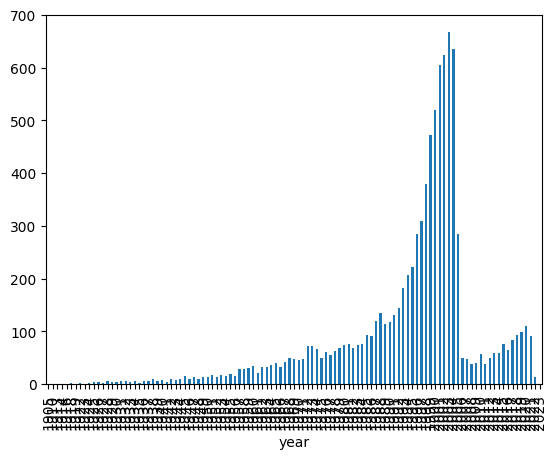

In [359]:
# we can count as many 700ish titles for the early 2000s
import matplotlib as plt
year_barplot = deduped_merge.groupby('year').size().plot.bar()
year_barplot

In [360]:
deduped_merge['year'].value_counts().nlargest(10)

year
2003    667
2004    635
2002    624
2001    604
2000    520
1999    473
1998    379
1997    310
2005    285
1996    285
Name: count, dtype: int64

In [361]:
# it would be interested to get a frequency count of countries who collaborated on a movie

len(deduped_merge['country'].unique())

727

In [362]:
# I'm counting 160 collaborations between the US and the UK. This is a very US-centric dataset
count_collabs = deduped_merge.groupby('country').size().sort_values(ascending=True)
# there are a lot of nan values in this column. let's drop them
count_collabs = count_collabs.drop('nan')
largest_collabs = count_collabs.nlargest(10)
largest_collabs

country
['United States']                      4002
['United Kingdom']                      782
['Japan']                               565
['India']                               272
['Canada']                              227
['Hong Kong']                           205
['France']                              168
['United Kingdom', 'United States']     156
['Canada', 'United States']              87
['United States', 'Canada']              84
dtype: int64

<Axes: >

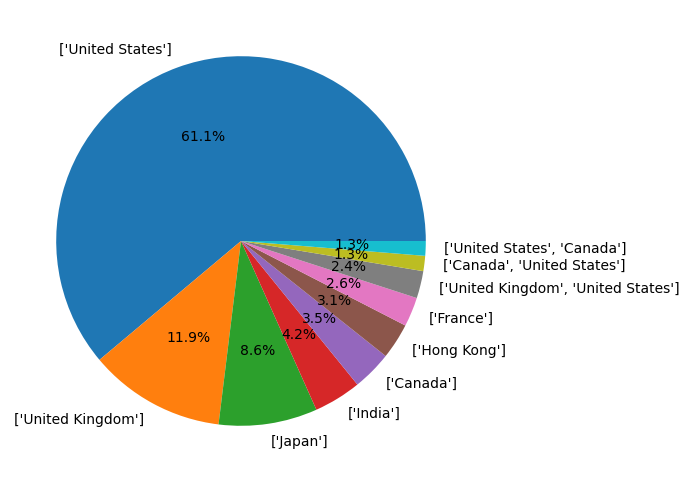

In [363]:
largest_collabs.plot(kind = 'pie', 

              figsize = (6, 6), autopct = '%1.1f%%', shadow = False)

In [364]:
select_df = deduped_merge[(deduped_merge['rating'] >= 7)]
country_df = select_df.dropna()
country_df

,Unnamed: 0,title,year,kind,rating,vote,runtime,composer,cast,language,director,country,genre,writer
1,1,Character,2021,movie,8.3,46.0,125,[Youki Kojima],"[Masaki Suda, Fukase, Mitsuki Takahata, Shidô ...",[Japanese],[Akira Nagai],['Japan'],"[Crime, Horror, Thriller]","[Takashi Nagasaki, Takashi Nagasaki, Anna Kawa..."
7,8,The Fighter,2010,movie,7.8,351199.0,116,[Michael Brook],"[Mark Wahlberg, Christian Bale, Amy Adams, Mel...",[English],[David O. Russell],['United States'],"[Biography, Drama, Sport]","[Scott Silver, Paul Tamasy, Eric Johnson]"
14,4865,By Dawn's Early Light,1990,tv movie,7.1,2898.0,100,[Trevor Jones],"[Powers Boothe, Rebecca De Mornay, James Earl ...","[English, Russian]",[Jack Sholder],['United States'],"[Action, Drama, Thriller]","[William Prochnau, Bruce Gilbert]"
16,15,Strange Relations,2001,tv movie,7.6,768.0,120,[Rupert Gregson-Williams],"[Paul Reiser, Amber Sealey, Lachele Carl, Geor...",[English],[Paul Seed],"['United Kingdom', 'United States']","[Drama, Comedy]",[Tim Kazurinsky]
19,18,Boycott,2001,tv movie,7.2,901.0,118,[Joseph Vitarelli],"[Jeffrey Wright, Terrence Howard, CCH Pounder,...",[English],[Clark Johnson],['United States'],"[Drama, History]","[Stewart Burns, Herman Daniel Farrell, Timothy..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,9806,No End,1985,movie,7.5,4582.0,107,[Zbigniew Preisner],"[Grazyna Szapolowska, Maria Pakulnis, Aleksand...","[Polish, English]",[Krzysztof Kieslowski],['Poland'],"[Drama, Romance]","[Krzysztof Kieslowski, Krzysztof Piesiewicz]"
9743,9813,The 39 Steps,1935,movie,7.6,54484.0,86,"[Jack Beaver, Louis Levy]","[Robert Donat, Madeleine Carroll, Lucie Mannhe...",[English],[Alfred Hitchcock],['United Kingdom'],"[Crime, Mystery, Thriller]","[John Buchan, Charles Bennett, Ian Hay]"
9748,9818,Gattaca,1997,movie,7.8,289781.0,106,[Michael Nyman],"[Ethan Hawke, Uma Thurman, Gore Vidal, Xander ...","[English, Esperanto]",[Andrew Niccol],['United States'],"[Drama, Sci-Fi, Thriller]",[Andrew Niccol]
9750,9820,Shakespeare in Love,1998,movie,7.1,218921.0,123,[Stephen Warbeck],"[Geoffrey Rush, Tom Wilkinson, ""Steven O'Donne...",[English],[John Madden],"['United States', 'United Kingdom']","[Comedy, Drama, History, Romance]","[Marc Norman, Tom Stoppard]"


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


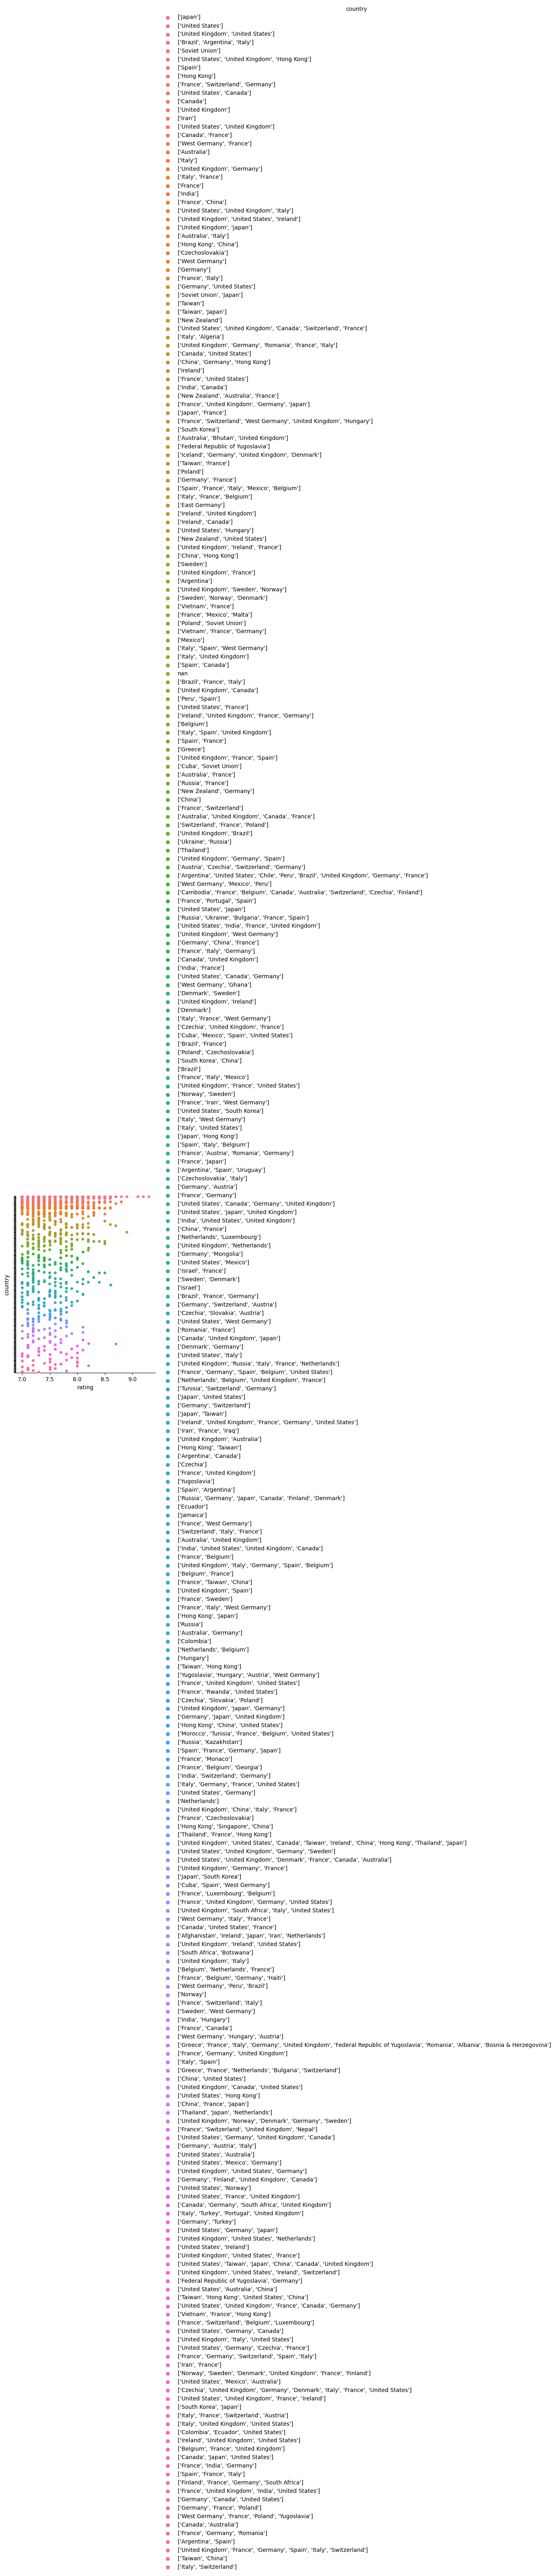

In [365]:
# Japan and the United States boasts some of the higher ratings.
import seaborn as sns
g = sns.catplot(x="rating", y="country", data=country_df, hue='country')
g.set(yticklabels=[])

# Machine Learning: Surfacing Movie Recommendations Using A Vector Search Database

# DistilBERT

In [437]:
# I initially tried more recent movies, assuming audiences don't want to watch older movies but the recommendations were a bit redundant. 
from_2005 = deduped_merge[deduped_merge['year']==2005]
from_2004 = deduped_merge[deduped_merge['year']==2004]
from_2003 = deduped_merge[deduped_merge['year']==2003]
from_2002 = deduped_merge[deduped_merge['year']==2002]
from_2001 = deduped_merge[deduped_merge['year']==2001]
from_2000 = deduped_merge[deduped_merge['year']==2000]
from_1999 = deduped_merge[deduped_merge['year']==1999]
from_1998 = deduped_merge[deduped_merge['year']==1998]
from_1997 = deduped_merge[deduped_merge['year']==1997]
from_1996 = deduped_merge[deduped_merge['year']==1996]
movie_years = [from_1996, from_1997, from_1998, from_1999, from_2000, from_2001, from_2002, from_2003, from_2004, from_2005]
decade_of_movies = pd.concat(movie_years)
print(len(decade_of_movies))

4782


In [478]:
# we'll recommend a list of titles based on favorite actors

titles = list(decade_of_movies['title'])

In [479]:
print(len(titles))

4782


In [210]:
# !pip3 install transformers
# !pip3 install sentence-transformers

In [480]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

embeddings = model.encode(titles)

embeddings

array([[ 0.45901152,  0.17252533,  0.32581162, ..., -0.76863074,
        -0.29108736, -0.7523923 ],
       [ 0.8648237 , -0.3001968 , -0.6609465 , ...,  0.27945215,
         0.05477162, -0.59134376],
       [ 0.16154438, -0.28980696,  0.42305768, ..., -1.0163083 ,
         0.19275084, -0.72186357],
       ...,
       [ 0.66439086, -0.05125123, -0.2730131 , ..., -1.2636539 ,
         0.3134384 , -0.74443054],
       [ 0.06264514,  0.5818635 , -0.5149295 , ..., -0.063008  ,
         1.0957313 ,  0.4141382 ],
       [-1.0692807 , -0.15507232, -0.22129194, ...,  0.3317281 ,
        -0.55025923, -0.5838932 ]], dtype=float32)

In [481]:
# Note: Using the default value of one p1 pod we can fit around 750K embeddings before the indexFullness reaches capacity. 
print(len(embeddings))
print(len(embeddings[0]))

4782
768


In [486]:
print(type(ratings[0]))

<class 'str'>


In [244]:
#!pip3 install pinecone-client

In [433]:
api_key = "be268b68-5c93-4026-a839-855ccd4d2aa8"

In [434]:
import pinecone
pinecone.init(api_key=api_key, environment="us-west4-gcp-free")

In [493]:
# make sure to delete your indexes before you do this. I'm on the free tier and only allowed 1 project/pod
# match dimensions to the number of embeddings
pinecone.create_index("moviedb", dimension=768, metric="euclidean")

In [494]:
index = pinecone.Index("moviedb")

In [498]:
# THIS IS COMMENTED OUT BECAUSE I DON'T WANT THE DATABASE TO REACH MAX CAPACITY
import string

ascii_chars = set(string.printable)

for z in range(0, 4669, 100): # upload in chunks of 100
  if z == 4668: 
    index.upsert([
      (''.join(filter(lambda x: x in ascii_chars, titles[x] + " " + genres[x] + " " + ratings[x])), [float(y) for y in list(embeddings[x])]) for x in range(0,4668)
    ])
  else: 
    index.upsert([
    (''.join(filter(lambda x: x in ascii_chars, titles[x] + " " + genres[x] + " " + ratings[x])), [float(y) for y in list(embeddings[x])]) for x in range(z,z+100)
  ])


{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

{'upserted_count': 100}

#### From a keyword search, we can deduce the following: 
1. Similar titles based on keyword similarity
2. Similar genres between titles recommended
3. Ratings

This works if the title contains some description of what the movie/TV series is about.

In [496]:
sentence = "Dinosaur Planet"

# Convert the sentence to a vector embedding
embedding = model.encode([sentence])
# [float(x) for x in embedding[0]]

In [497]:
# The results won't surprise you. The titles recommended are also about dinosaurs.

[index.query(vector= [float(x) for x in embedding[0]],top_k=10,include_values=True)['matches'][x]['id'] for x in range(10)]

["Dinosaur Planet ['Documentary', 'Animation', 'Family'] 7.7",
 "T-Rex: Back to the Cretaceous ['Adventure', 'Family', 'Fantasy'] 4.7",
 "The Land Before Time XI: Invasion of the Tinysauruses ['Animation', 'Adventure', 'Drama', 'Family', 'Musical'] 5.7",
 "Godzilla the Series: Monster Wars ['Action', 'Sci-Fi'] 6.2",
 "Dinotopia ['Adventure', 'Family', 'Fantasy', 'Sci-Fi'] 6.6",
 "Godzilla vs. Megaguirus ['Action', 'Horror', 'Sci-Fi'] 6.2",
 "Godzilla 2000: Millennium ['Action', 'Adventure', 'Drama', 'Sci-Fi', 'Thriller'] 6.1",
 "Godzilla Against MechaGodzilla ['Action', 'Sci-Fi', 'Thriller'] 6.7",
 "Carnosaur 3: Primal Species ['Action', 'Horror', 'Sci-Fi'] 3.2",
 "Monster Island ['Adventure', 'Comedy', 'Horror', 'Sci-Fi'] 3.6"]

In [507]:
# most space movies fall in the categories of sci-fi, and documentary.

sentence = "Aelita, the Queen of Mars"
embedding = model.encode([sentence])

In [504]:
[index.query(vector= [float(x) for x in embedding[0]],top_k=10,include_values=True)['matches'][x]['id'] for x in range(10)]

["Temptress Moon ['Drama', 'Romance'] 6.7",
 "Space Odyssey: Voyage to the Planets ['Documentary', 'Drama', 'Sci-Fi'] 7.7",
 "Mars Dead or Alive ['Documentary'] 7.7",
 "NOVA: To the Moon ['Documentary'] 8.8",
 "Ultimate Crop Circles: Signs from Space? ['Documentary'] 7.0",
 "Battlestar Galactica ['Action', 'Adventure', 'Drama', 'Sci-Fi'] 8.6",
 "Laserhawk ['Action', 'Adventure', 'Sci-Fi'] 4.1",
 "The 'Alien' Saga ['Documentary'] 7.7",
 "Space Fury ['Action', 'Mystery', 'Sci-Fi', 'Thriller'] 2.3",
 "Starship Girl Yamamoto Yohko ['Animation', 'Adventure', 'Comedy', 'Sci-Fi'] 6.5"]

In [508]:
# Now this title is actually a thriller! But the keyword "diary" suggests that it will be documentary, hence why so many documentaries were recommended. 

sentence = "The Diary of Ellen Rimbauer"
embedding = model.encode([sentence])

In [506]:
[index.query(vector= [float(x) for x in embedding[0]],top_k=10,include_values=True)['matches'][x]['id'] for x in range(10)]

["The Diary of Ellen Rimbauer ['Drama', 'Horror', 'Mystery', 'Thriller'] 5.5",
 "Pie in the Sky: The Brigid Berlin Story ['Documentary', 'Biography'] 7.1",
 "The Wolves of Kromer ['Fantasy', 'Horror', 'Comedy', 'Romance'] 5.9",
 "Marlene Dietrich: Her Own Song ['Documentary', 'Biography'] 7.9",
 "George Clinton: The Mothership Connection ['Documentary', 'Music'] 8.9",
 "Hofmann's Potion ['Documentary'] 7.2",
 "Jimi Hendrix: Electric Ladyland ['Documentary', 'Music'] 7.8",
 "Ljuset hller mig sllskap ['Documentary'] 7.0",
 "Legend of Crystania: The Chaos Ring ['Animation', 'Action', 'Fantasy'] 6.4",
 "Anne Frank: The Whole Story ['Biography', 'Drama', 'War'] 8.0"]

# WHAT I WOULD HAVE DONE DIFFERENTLY

If I were to predict the rating of a movie, I would:
1. Build lists of features for each column (i.e. cast, director, writer, genre, ratings, and titles), removing empty or unnecessary features. Some of these columns are lists, that's the tricky part.
2. Study the distributions of these lists for potential skew. 
3. Build numerical or binary representations of these features (to determine whether presence of the feature impacts rating). 
4. Find concentration of binary points to see if it's linear. 
5. Split features into training, test and validation sets.
6. Then create a regression model using Scikit Learn.
7. Finally check for accuracy of predictions.

Similarly, if we were to predict the versatility of an actor, we'd hot encode genre data and run a regression model on these features. The more versatile the actor, the more genres of movies or tv series they've starred in.